In [7]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy as sc

from MastodonFunctions import xml_features, csv_features, ordering_tracks, smoothing_filter, peak_detection, bulk_peak_analysis

# Define the path for the data

In [8]:
# Path to .xml file generated when creating the .hdf5
path_xml = 'Dataset/dataset.xml' 

# Path to the -edges.csv amd -vertices.csv files (You only need path + name of file without the -edges or -vertices extension)
path_csv = 'Dataset/dataset' 

# Path to -mamut.xml file
path_real_xml = 'Dataset/dataset_mamut.xml'

# Path to .csv file for notochord
#path_notochord = 'D:\\Charlyne\\ROI\\RoiSet2'

# Image characteristics

In [9]:
# Time resolution in seconds (how often do you acquire time points)
tr = 90 # in seconds

# Number of points in ROI per frame (needs to be equal!)
notochord_points = 32

fts = xml_features(path_xml)

# Features from the image obtained from the .xml generated by BigData Viewer
print('The image has the following dimensions (XYZC): %d, %d, %d, %d'%(fts.width, fts.height, fts.n_slices, fts.channels))
print('There are %d frames in total.'%fts.n_frames)
print('Pixel Size: x = %.3g %s, y = %.3g %s z = %.2g %s'%(fts.x_pixel, fts.units, fts.y_pixel, fts.units, fts.z_pixel, fts.units))
print('There are %d Z-slices in total'%fts.n_slices)

#pixel size of the image (for y inversion)
y_inversion = fts.height

#pixel to micrometers conversion for distances
conversion_factor = np.sqrt( fts.x_pixel**2 + fts.y_pixel**2)

The image has the following dimensions (XYZC): 2048, 2048, 150, 2
There are 110 frames in total.
Pixel Size: x = 0.347 µm, y = 0.347 µm z = 1.5 µm
There are 150 Z-slices in total


# Tracks from all cells

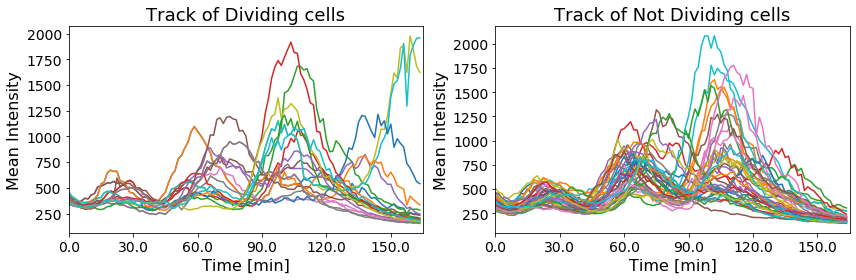

In [10]:
spots = csv_features(path_csv, path_xml)
tracks = ordering_tracks(path_csv, path_xml)

plt.figure(figsize=[12,4])
plt.subplot(121)
for j in range(tracks.n_tracks_divs):
    if tracks.spots_features['DivID'][j]>0:
        tr_min = round(tr/60,2)
        plt.plot(tracks.spots_features['Frames'][j], tracks.spots_features['Mean'][j])

plt.title('Track of Dividing cells', fontsize = 18)
plt.xlabel('Time [min]', fontsize=16)
locs, labels = plt.xticks()
plt.xticks(locs, np.round(locs*tr_min), fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Mean Intensity', fontsize=16)
plt.xlim([0,fts.n_frames])

plt.subplot(122)
for j in range(tracks.n_tracks_divs):
    if tracks.spots_features['DivID'][j]==0:
        tr_min = round(tr/60,2)
        plt.plot(tracks.spots_features['Frames'][j], tracks.spots_features['Mean'][j])

plt.title('Track of Not Dividing cells', fontsize = 18)
plt.xlabel('Time [min]', fontsize=16)
locs, labels = plt.xticks()
plt.xticks(locs, np.round(locs*tr_min), fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Mean Intensity', fontsize=16)
plt.xlim([0,fts.n_frames])

plt.tight_layout()
plt.show()

# X Y Position Dynamics

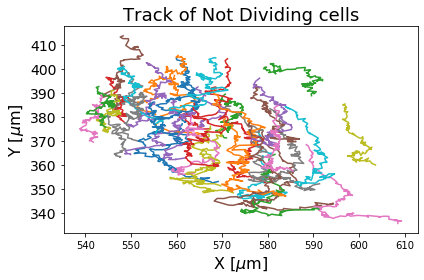

In [11]:

for j in range(tracks.n_tracks_divs):
    if tracks.spots_features['DivID'][j]==0:
        tr_min = round(tr/60,2)
        
        #plot in micrometers
        plt.plot(fts.x_pixel*tracks.spots_features['X'][j],fts.y_pixel*tracks.spots_features['Y'][j])

plt.title('Track of Not Dividing cells', fontsize = 18)
plt.xlabel(r'X [$\mu$m]', fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel(r'Y [$\mu$m]', fontsize=16)


plt.tight_layout()
plt.show()

# Smooth the data

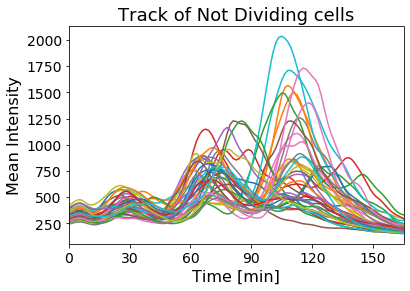

In [12]:
window = 8

for j in range(tracks.n_tracks_divs):
    if tracks.spots_features['DivID'][j]==0:
        tr_min = round(tr/60,2)
        y = smoothing_filter(tracks.spots_features['Mean'][j], window)
        plt.plot(y)

plt.title('Track of Not Dividing cells', fontsize = 18)
plt.xlabel('Time [min]', fontsize=16)
locs, labels = plt.xticks()
plt.xticks(locs, map(int,np.round(locs*tr_min)), fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Mean Intensity', fontsize=16)
plt.xlim([0,fts.n_frames])
plt.show()